# Assignment 0

In [ ]:
#from google.colab import files
#files.upload()


import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import umap
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('train_in.csv')
y = pd.read_csv('train_out.csv')

df_train = pd.read_csv('train_in.csv')
y_train = pd.read_csv('train_out.csv')
test_in = pd.read_csv('test_in.csv')
test_out = pd.read_csv('test_out.csv')

In [20]:
df.columns = [str(i) for i in range(1, len(df.columns) +1)]
df_train.columns = [str(i) for i in range(1, len(df_train.columns) +1)]
test_in.columns = [str(i) for i in range(1, len(test_in.columns) +1)]

## Task 1


1.   Create a distance matrix of the vectors



In [21]:
df['target'] = y['6']

In [22]:
df = df.groupby('target').mean()
df = df.reset_index()

In [23]:
df.drop("target", axis=1, inplace=True)

In [24]:
distance = np.zeros((len(df), len(df)))

for i in range(len(df)):
  for j in range(len(df)):
    distance[i][j] = np.linalg.norm(df.iloc[i] - df.iloc[j])

In [25]:
fig = px.imshow(distance, text_auto='.2f', title="Distance Matrix", width=800, height=800)
fig.show()

2.   PCA, U-MAP, T-SNE



### PCA

In [26]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_train)
df_pca = np.append(df_pca, y, axis=1)
df_pca

array([[ 6.62228487,  1.04392481,  5.        ],
       [ 1.03557636, -2.21522449,  4.        ],
       [-2.47368371, -6.41975384,  7.        ],
       ...,
       [-3.75260021, -5.42738812,  7.        ],
       [-3.7456313 , -2.30418232,  9.        ],
       [-0.04370545, -4.41563013,  8.        ]])

In [27]:
fig = px.scatter(x=df_pca[:,0], y=df_pca[:,1], color=df_pca[:,2])
fig.show()

### U-MAP

In [28]:
df_umap = umap.UMAP(n_components=2, n_neighbors=9, random_state=42).fit_transform(df_train)
df_umap = np.append(df_umap, y, axis=1)
df_umap

array([[ 8.18827343,  5.0522747 ,  5.        ],
       [ 0.38093737,  9.14208126,  4.        ],
       [ 0.91805834, 12.81468868,  7.        ],
       ...,
       [ 0.87569797, 13.02818489,  7.        ],
       [-0.3352823 , 11.80271339,  9.        ],
       [ 5.97876883,  7.92875624,  8.        ]])

In [29]:
fig = px.scatter(x=df_umap[:,0], y=df_umap[:,1], color=df_umap[:,2])
fig.show()

### T-SNE

In [30]:
from sklearn.manifold import TSNE

df_tsne = TSNE(n_components=2, perplexity=9, random_state=42).fit_transform(df_train)
df_tsne = np.append(df_tsne, y, axis=1)
df_tsne

array([[ 46.92235184, -12.86505127,   5.        ],
       [-60.28961945, -12.17603207,   4.        ],
       [-24.04622459, -47.29189682,   7.        ],
       ...,
       [-25.74575424, -44.01134491,   7.        ],
       [-30.89493752, -23.79815483,   9.        ],
       [ 15.08564758, -58.56545639,   8.        ]])

In [31]:
fig = px.scatter(x=df_tsne[:,0], y=df_tsne[:,1], color=df_tsne[:,2])
fig.show()



3.   Nearest Mean Classifier



In [32]:
def nearest_mean_classifier(center, df):
  final = np.ndarray(len(df), dtype=int)

  for i in range(len(df)):
    dist = np.zeros(10)
    for j in range(10):
      dist[j] = np.linalg.norm(df.iloc[i] - center.iloc[j])

    final[i] = np.argmin(dist)
  return final

In [33]:
def accuracy(final, y):
  correct=0
  wrong=0
  for i in range(len(final)):
    if final[i] == y.iloc[i, 0]:
      correct+=1
    else:
      wrong+=1

  print(f"correct: {correct}, wrong: {wrong}")

  accuracy = correct/len(final)
  print(f"accuracy: {accuracy:.2f}%")


Train test

In [34]:
final = nearest_mean_classifier(df, df_train)

correct: 1473, wrong: 233
accuracy: 0.86%


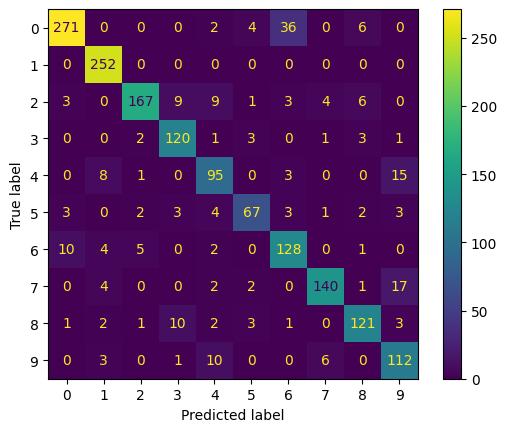

In [35]:
accuracy(final, y_train)
conf_train = confusion_matrix(y_train, final)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_train, display_labels=range(10))
disp.plot();

Test set

In [36]:
final_t = nearest_mean_classifier(df, test_in)

correct: 803, wrong: 196
accuracy: 0.80%


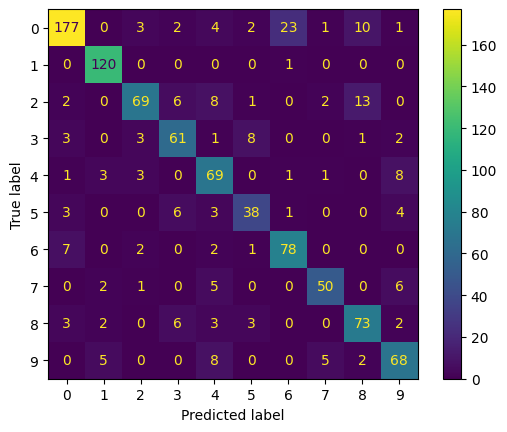

In [37]:
accuracy(final_t, test_out)
conf_test = confusion_matrix(test_out, final_t)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_test, display_labels=range(10))
disp.plot();



4.   KNN



In [38]:
y_center = [0,1,2,3,4,5,6,7,8,9]

In [39]:
for i in range(1,10):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(df, y_center)

  y_pred_train = model.predict(df_train)
  y_pred_test = model.predict(test_in)

  print(f"Accuracy train with {i} neighbors: {accuracy_score(y, y_pred_train):.2f}%")
  print(f"Accuracy test with {i} neighbors: {accuracy_score(test_out, y_pred_test):.2f}%")

Accuracy train with 1 neighbors: 0.86%
Accuracy test with 1 neighbors: 0.80%
Accuracy train with 2 neighbors: 0.68%
Accuracy test with 2 neighbors: 0.62%
Accuracy train with 3 neighbors: 0.54%
Accuracy test with 3 neighbors: 0.53%
Accuracy train with 4 neighbors: 0.48%
Accuracy test with 4 neighbors: 0.48%
Accuracy train with 5 neighbors: 0.44%
Accuracy test with 5 neighbors: 0.43%
Accuracy train with 6 neighbors: 0.40%
Accuracy test with 6 neighbors: 0.39%
Accuracy train with 7 neighbors: 0.38%
Accuracy test with 7 neighbors: 0.38%
Accuracy train with 8 neighbors: 0.36%
Accuracy test with 8 neighbors: 0.36%
Accuracy train with 9 neighbors: 0.33%
Accuracy test with 9 neighbors: 0.34%


In [40]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(df, y_center)

y_pred_train = model.predict(df_train)
y_pred_test = model.predict(test_in)

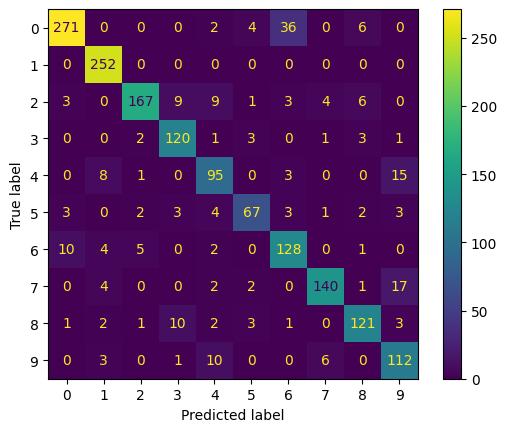

In [41]:
conf_knn = confusion_matrix(y, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_knn, display_labels=range(10))
disp.plot();

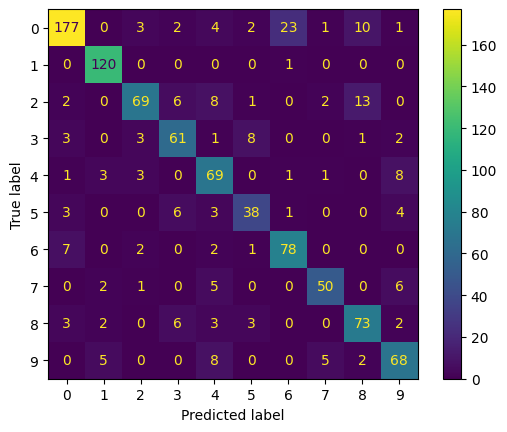

In [42]:
conf_knn = confusion_matrix(test_out, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_knn, display_labels=range(10))
disp.plot();

## Task 2 Multi-class perceptron

In [43]:
X = df_train.values.astype(float)
y = y_train.values.astype(int)

In [47]:
class Perceptron:
  def __init__(self, lr=0.001, epochs=10, n_class=10):
    self.lr = lr
    self.epochs = epochs
    self.n_class = n_class
    self.W = None
    self.b = np.random.normal(0, 0.01, self.n_class)
    self.tl = np.zeros(self.epochs)
    self.acc = np.zeros(self.epochs)

  def fit(self, X, y):
    X_samples, X_features = X.shape
    self.W = np.random.normal(0, 0.01, (X_features, self.n_class))

    for epoch in range(self.epochs):
      total_loss = 0
      accuracy_temp = np.zeros(X_samples)
      for i in range(X_samples):
        x = X[i]
        y_true = y[i]
        z = x @ self.W + self.b
        y_pred = np.argmax(z)
        accuracy_temp[i] = y_pred

        target = np.zeros(self.n_class)
        target[y_true] = 1

        err = target - z
        loss = np.sum(err ** 2)
        total_loss += loss

        for j in range(self.n_class):
          self.b[j] += self.lr * err[j]
          self.W[:, j] += self.lr * err[j] * x

      self.acc[epoch] = self.accuracy(accuracy_temp, y)
      total_loss = total_loss/X_samples
      self.tl[epoch] = total_loss
      #print(f"Epoch {epoch}: Loss = {total_loss:.4f}, Acc = {self.acc[epoch]:.8f}%")

    ep = np.arange(self.epochs)
    ep = ep[..., None]
    self.tl = self.tl[..., None]
    self.acc = self.acc[..., None]
    loss = np.append(self.tl, ep, axis=1)
    accu = np.append(self.acc, ep, axis=1)
    fig = px.line(x=loss[:,1], y=loss[:,0], labels={"x": "Epochs", "y": "Loss"}, title = f"perceptron lr = {self.lr}")
    fig.show()
    fig = px.line(x=accu[:,1], y=accu[:,0], labels={"x": "Epochs", "y": "% Accuracy"}, title = f"perceptron lr = {self.lr}")
    fig.show()


  def predict(self, X):
    z = X @ self.W + self.b
    return np.argmax(z, axis=1)

  def accuracy(self, pred, y):
    correct=0
    wrong=0
    for i in range(len(pred)):
      if pred[i] == y[i]:
        correct+=1
      else:
        wrong+=1
    return correct/len(pred)


In [48]:
lr = [0.001, 0.0001, 0.00001]
for i in lr:
  p = Perceptron(epochs = 70, lr=i)
  p.fit(X, y)

In [49]:
p = Perceptron(epochs = 70, lr=0.0001)
p.fit(X, y)
y_pred = p.predict(test_in)
perceptron = accuracy_score(y_pred, test_out)
print(f"Accuracy: {perceptron:.4f}%")


Accuracy: 0.8699%
